In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 
from scipy import stats

# Description

This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

This dataset includes reviews (ratings, text, helpfulness votes)
source:
http://jmcauley.ucsd.edu/data/amazon/

# Prepare Dataset 

- load data 
- check for missing data 
- add columns based off 'helpful' column
- add columns for word and character count of reviewText/summary columns 
- add target variable column (bad_review - any review with a rating of 2 or less) 

In [2]:
# load data into dataframe 
raw_df = pd.read_json('reviews_Video_Games_5.json', lines=True)

In [3]:
raw_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600


In [4]:
# check for missing values 
raw_df.isnull().sum()

asin                 0
helpful              0
overall              0
reviewText           0
reviewTime           0
reviewerID           0
reviewerName      2813
summary              0
unixReviewTime       0
dtype: int64

In [5]:
# unpack list in values in helpful column 
helpful = list(raw_df.helpful)

# 1st value in helpful list 
raw_df['rating_helpful'] = [i[0] for i in helpful]

# 2nd value in helpful list 
raw_df['rating_total'] = [i[1] for i in helpful]

# percentage of rating 
raw_df['rating_percentage'] = raw_df['rating_helpful']/ raw_df['rating_total']
raw_df.rating_percentage.fillna(0, inplace=True)

In [6]:
raw_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_helpful,rating_total,rating_percentage
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000,8,12,0.666667
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,0,0,0.000000
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,0,0,0.000000
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400,7,10,0.700000
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,2,2,1.000000


In [7]:
# create column for character count 
raw_df['character_cnt_review'] = raw_df['reviewText'].str.len()

# create column for word count 
raw_df['word_cnt_review'] = [len(i.split()) for i in raw_df.reviewText]

# create column for character count in summary 
raw_df['character_cnt_summary'] = raw_df['summary'].str.len()

# create column for word count in summary 
raw_df['word_cnt_summary'] = [len(i.split()) for i in raw_df.summary]

raw_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_helpful,rating_total,rating_percentage,character_cnt_review,word_cnt_review,character_cnt_summary,word_cnt_summary
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000,8,12,0.666667,779,118,40,8
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,0,0,0.000000,304,53,15,3
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,0,0,0.000000,282,53,9,2
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400,7,10,0.700000,3489,646,47,9
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,2,2,1.000000,294,62,6,2


In [8]:
#unique values in 'overall' column
raw_df.overall.unique()

array([1, 4, 3, 5, 2])

In [9]:
#create target variable "bad_review"
#reviews rated under 3 is considered a bad review 

raw_df['bad_review'] = np.nan
raw_df.loc[raw_df.overall >= 3, 'bad_review'] = 0 
raw_df.loc[raw_df.overall < 3, 'bad_review'] = 1 
raw_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_helpful,rating_total,rating_percentage,character_cnt_review,word_cnt_review,character_cnt_summary,word_cnt_summary,bad_review
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000,8,12,0.666667,779,118,40,8,1.0
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,0,0,0.000000,304,53,15,3,0.0
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,0,0,0.000000,282,53,9,2,1.0
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400,7,10,0.700000,3489,646,47,9,0.0
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,2,2,1.000000,294,62,6,2,0.0


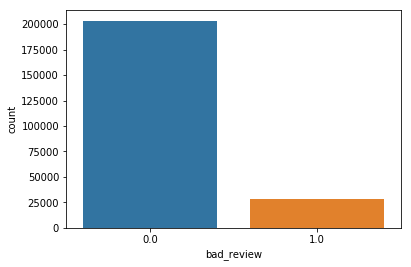

Non-bad review count:  203264
Bad review count:  28516


In [10]:
# bar plot of bad review count vs. non-bad review count 
sns.countplot(raw_df.bad_review)
plt.show()

print("Non-bad review count: ",raw_df[raw_df.bad_review==0].bad_review.count())
print("Bad review count: ", raw_df[raw_df.bad_review==1].bad_review.count())

# Create dataframes of word counts from bad reviews

In [11]:
import re 

word_list_bad = []
for i in raw_df.loc[raw_df.bad_review == 1,'reviewText']:
    #remove punctuation 
    yes = re.sub(r'[^\w\s]','',i)
    #split review by words 
    s = yes.lower().split()
    #add words to list 
    word_list_bad.extend(s) 

    
from collections import Counter
#word count within list 
counts_bad = Counter(word_list_bad)    

In [12]:
#transform array to dictionary 
counts_bad = dict(counts_bad)

#transform dictionary to Series 
bad_series = pd.Series(counts_bad)

#sort values - descending 
bad_series.sort_values(ascending=False,inplace=True)

#transform series to frame 
bad_df = bad_series.to_frame()

In [13]:
#review word counts 
bad_df.iloc[:25]

,0
the,309220
to,163375
and,154103
a,139739
i,118653
of,110347
game,98824
is,97768
it,96585
you,95105


# Feature Engineering
- add test words 
- upsample bad reviews 
- feature engineer variables with using logistical regression analysis 

In [14]:
reviews_df = raw_df.copy()

In [15]:
#review list and look at exclude 'out, not, but, etc.'
words = ['because','dont','more','only','other',
        'really','even','didn', 'did','didnt','cannot','can', 
        'cant','when', 'bad', 'horrible', 'worse', 'worst',
        'wors', 'money', 'over', 'terrible', 'would',
        'some', 'time', 'better','graphics', 'playing',
        'buy', 'also', 'could', 'most', 'off', 'still',
        'doesnt', 'never', 'down', 'should', 'money',
        'nothing', 'little', 'something', 'why','gameplay'
        ]

for word in words:
    #Create binary variable from each word in list 
    reviews_df[str(word)] = reviews_df.reviewText.str.contains(
        str(word),
        case=False
    )

In [16]:
reviews_df.isnull().sum()

asin                        0
helpful                     0
overall                     0
reviewText                  0
reviewTime                  0
reviewerID                  0
reviewerName             2813
summary                     0
unixReviewTime              0
rating_helpful              0
rating_total                0
rating_percentage           0
character_cnt_review        0
word_cnt_review             0
character_cnt_summary       0
word_cnt_summary            0
bad_review                  0
because                     0
dont                        0
more                        0
only                        0
other                       0
really                      0
even                        0
didn                        0
did                         0
didnt                       0
cannot                      0
can                         0
cant                        0
when                        0
bad                         0
horrible                    0
worse     

In [17]:
reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_helpful,...,still,doesnt,never,down,should,nothing,little,something,why,gameplay
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000,8,...,False,False,True,False,True,False,False,False,False,False
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,0,...,False,False,False,False,False,False,False,False,False,False
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,0,...,False,False,False,False,False,True,False,False,False,False
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400,7,...,True,False,True,True,False,False,True,False,False,True
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,2,...,False,False,False,False,True,False,False,False,False,False


In [18]:
from sklearn.model_selection import train_test_split

#create variable for features 
column = reviews_df.drop('bad_review',1).columns

#split data into train v. test 
data = reviews_df[column[9:]]
target = reviews_df.bad_review
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=target)

In [19]:
from imblearn.over_sampling import SMOTE

#balance dataset using "SMOTE"
sm = SMOTE(ratio="auto", kind="regular")
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, 
                                                     y_train)

In [20]:
#model data using LASSO Logistic Regression to 
##identify weak feature variables 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1')

fit = lr.fit(X_train_resampled, y_train_resampled)

In [21]:
fit.coef_

array([[-2.42668117e-01,  2.30113563e-01,  1.92754631e-01,
         4.15654928e-04, -5.31209391e-03,  1.14655675e-02,
        -4.44331203e-02,  1.83313476e-01,  1.17067897e-01,
        -1.60150255e-01,  1.62811834e-01,  1.08834505e-01,
        -2.10624382e-01,  4.69115537e-01,  2.45064348e-01,
         2.80498078e-01, -1.22132715e-01,  8.07959201e-01,
        -2.66909564e-01,  9.28664325e-02,  1.47423420e-01,
         6.53660247e-01,  1.88954813e+00,  1.22694055e+00,
         1.82292064e+00,  3.41745800e-01,  1.16284536e+00,
        -1.53851769e-01,  1.84353030e+00,  4.26369165e-01,
        -3.91130790e-01,  9.31003492e-02, -4.75125011e-02,
        -2.43900606e-01, -1.70508164e-01,  2.46599528e-01,
        -5.21401529e-01,  4.44265938e-01, -9.70386270e-02,
         2.97752498e-01, -4.24046464e-01,  3.87090834e-01,
         1.46272644e-01,  1.45568056e-01,  2.16587829e-01,
         7.52086213e-01, -3.77816961e-01,  4.32056688e-01,
         5.41440767e-01, -1.36725992e-01]])

In [22]:
lr.score(X_train_resampled, y_train_resampled)

0.7607757038168388

In [23]:
lr.score(X_test,y_test)

0.8111991423491267

In [24]:
#Cross validataion score

from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_test, y_test, cv=10)

array([0.89005099, 0.89188129, 0.89488822, 0.89148908, 0.8922735 ,
       0.89397307, 0.89109688, 0.89266571, 0.89448222, 0.89408996])

In [25]:
#confusion matrix 

from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[55866, 11212],
       [ 3229,  6181]])

### Review Independent Variables to see if they can be removed

In [26]:
coef_df = pd.DataFrame(np.reshape(fit.coef_, (50,1)),
                       list(reviews_df[column[9:]].columns))
coef_df

,0
rating_helpful,-0.242668
rating_total,0.230114
rating_percentage,0.192755
character_cnt_review,0.000416
word_cnt_review,-0.005312
character_cnt_summary,0.011466
word_cnt_summary,-0.044433
because,0.183313
dont,0.117068
more,-0.160150


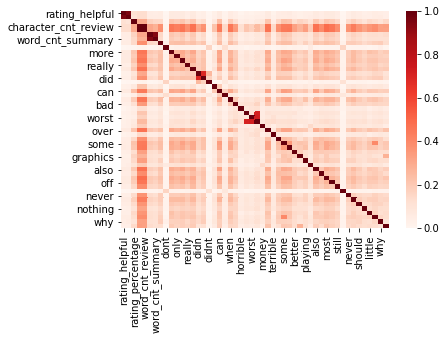

,rating_helpful,rating_total,rating_percentage,character_cnt_review,word_cnt_review,character_cnt_summary,word_cnt_summary,because,dont,more,...,still,doesnt,never,down,should,nothing,little,something,why,gameplay
rating_helpful,1.000000,0.953396,0.119989,0.134164,0.133403,0.050701,0.044788,0.053088,-0.000356,0.067237,...,0.051457,0.000439,0.042803,0.064047,0.050875,0.035827,0.043676,0.054358,0.047758,0.038418
rating_total,0.953396,1.000000,0.100812,0.132578,0.131947,0.056006,0.049333,0.054250,0.005461,0.064898,...,0.048658,0.002784,0.043976,0.063943,0.053944,0.042630,0.039800,0.056430,0.057751,0.037090
rating_percentage,0.119989,0.100812,1.000000,0.299756,0.299000,0.169076,0.150158,0.144941,0.003730,0.212312,...,0.147028,0.007551,0.136679,0.180262,0.136409,0.102642,0.143134,0.130508,0.100654,0.145563
character_cnt_review,0.134164,0.132578,0.299756,1.000000,0.998485,0.309686,0.275746,0.380170,0.017957,0.459540,...,0.387326,0.025382,0.369338,0.438323,0.366373,0.319636,0.360424,0.387495,0.328638,0.335578
word_cnt_review,0.133403,0.131947,0.299000,0.998485,1.000000,0.309021,0.277139,0.385696,0.022388,0.460793,...,0.389613,0.027806,0.371358,0.439980,0.367414,0.320436,0.363074,0.390129,0.332584,0.329662
character_cnt_summary,0.050701,0.056006,0.169076,0.309686,0.309021,1.000000,0.941016,0.153143,0.003776,0.209995,...,0.156762,0.010518,0.136705,0.168615,0.144253,0.107724,0.130647,0.131933,0.125762,0.138533
word_cnt_summary,0.044788,0.049333,0.150158,0.275746,0.277139,0.941016,1.000000,0.141372,0.008146,0.190846,...,0.146663,0.011903,0.123372,0.150968,0.131239,0.096746,0.118494,0.119235,0.115246,0.119331
because,0.053088,0.054250,0.144941,0.380170,0.385696,0.153143,0.141372,1.000000,0.034775,0.225750,...,0.178389,0.025205,0.186503,0.192162,0.172570,0.139886,0.161402,0.181716,0.185968,0.131663
dont,-0.000356,0.005461,0.003730,0.017957,0.022388,0.003776,0.008146,0.034775,1.000000,0.018380,...,0.014360,0.165877,0.009830,0.015643,0.017360,0.015563,0.007688,0.016598,0.037218,0.007224
more,0.067237,0.064898,0.212312,0.459540,0.460793,0.209995,0.190846,0.225750,0.018380,1.000000,...,0.231548,0.024926,0.189680,0.245330,0.205977,0.171356,0.230974,0.213531,0.172185,0.195952


In [27]:
corr = reviews_df[column[9:]].astype(float).corr()
sns.heatmap(corr,cmap="Reds")
plt.show()
corr 

In [28]:
#review variables that can be removed
corr[corr > 0.8]

,rating_helpful,rating_total,rating_percentage,character_cnt_review,word_cnt_review,character_cnt_summary,word_cnt_summary,because,dont,more,...,still,doesnt,never,down,should,nothing,little,something,why,gameplay
rating_helpful,1.000000,0.953396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_total,0.953396,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_percentage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
character_cnt_review,NaN,NaN,NaN,1.000000,0.998485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
word_cnt_review,NaN,NaN,NaN,0.998485,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
character_cnt_summary,NaN,NaN,NaN,NaN,NaN,1.000000,0.941016,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
word_cnt_summary,NaN,NaN,NaN,NaN,NaN,0.941016,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
because,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
more,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#remove 'rating_total', 'word_cnt_review', 'word_cnt_summary' do to high correlation 
#   with other variables 
#remove 'word_cnt_review', 'word_cnt_summary', 'character_cnt_review', 'character_cnt_summary'
#   due to low coefficient (under .05) 

remove = ['rating_total', 'word_cnt_review', 'word_cnt_summary', 
          'character_cnt_review', 'character_cnt_summary']

# retest model using logistical LASSO regression 

data = reviews_df[column[9:]].drop(remove,1)
target = reviews_df['bad_review']


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

sm = SMOTE(ratio="auto", kind="regular")
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, 
                                                     y_train)

In [30]:
fit = lr.fit(X_train_resampled, y_train_resampled)

In [31]:
#cross validation score 

cross_val_score(lr, X_test, y_test, cv=10)

array([0.88117647, 0.88091503, 0.88403713, 0.8791999 , 0.88116094,
       0.87841548, 0.88062238, 0.87905335, 0.87931485, 0.8791841 ])

In [32]:
#confusion matrix 

y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[47246, 19866],
       [ 3427,  5949]])

In [33]:
fit.coef_

array([[ 0.00798737, -0.02420135,  0.08925724, -0.01412359, -0.17821266,
         0.1022034 ,  0.08989497, -0.27274175,  0.39768236,  0.24171288,
         0.1244319 , -0.17715365,  0.52977427, -0.16634904, -0.19327489,
         0.03297769,  0.53774531,  1.45045134,  0.39371483,  1.06047501,
         0.60352581,  0.95921308, -0.13428923,  1.4049609 ,  0.32732818,
        -0.37393222,  0.02436632, -0.17907074, -0.24044208, -0.25617249,
         0.19179466, -0.67790939,  0.27220421, -0.22706068,  0.11284341,
        -0.63767992,  0.04415523, -0.07594511, -0.02960805,  0.06731279,
         0.50954636, -0.61408899,  0.32175987,  0.39421586, -0.31592891]])

In [34]:
lr.score(X_test,y_test)

0.6954685702332392

# Baseline model 

Although the second model is less accurate, it is much faster. Therefore, we will use this as a baseline model, and fit the following models to see if they are more accurate:

- Logistic Ridge Regression 
- Random Forest 
- Esemble Model of Logistic Ridge Regression and Logistic LASSO Regression 

#### Logistic Ridge Regression

In [35]:
lr = LogisticRegression(penalty='l2')

lr.fit(X_train_resampled, y_train_resampled)
lr.score(X_train_resampled, y_train_resampled)

0.6697073858628592

In [36]:
cross_val_score(lr, X_test, y_test, cv=10)

array([0.88117647, 0.88104575, 0.88416787, 0.8791999 , 0.88116094,
       0.87828474, 0.88075314, 0.87905335, 0.87905335, 0.8791841 ])

In [37]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[47249, 19863],
       [ 3430,  5946]])

#### Random Forest Classifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)
rfc.score(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9672204594864563

In [39]:
cross_val_score(rfc, X_test, y_test, cv=10)

array([0.87712418, 0.88104575, 0.88194535, 0.88312198, 0.88037652,
       0.88364492, 0.88245293, 0.8814069 , 0.8811454 , 0.88349895])

In [40]:
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[64688,  2424],
       [ 7225,  2151]])

### Ensemble Model of Ridge and LASSO Logistic Regression 

In [41]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(penalty='l1')
model2 = LogisticRegression(penalty='l2')
model = VotingClassifier(estimators=[('lr1', model1), ('lr2', model2)], voting='hard')
model.fit(X_train_resampled,y_train_resampled)
model.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6954816441794791

In [42]:
model1 = RandomForestClassifier()
model2 = LogisticRegression(penalty='l2')
model = VotingClassifier(estimators=[('rfc', model1), ('lr2', model2)], voting='soft')
model.fit(X_train_resampled,y_train_resampled)
model.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8566049576404142

In [43]:
cross_val_score(model, X_test, y_test, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

array([0.88352941, 0.88235294, 0.88808995, 0.88155314, 0.88521375,
       0.88325271, 0.8853295 , 0.88219142, 0.88428347, 0.88349895])

In [44]:
X = reviews_df[column[9:]].drop(remove,1)
y = reviews_df.bad_review

model.score(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9210803348002417

In [45]:
y_pred = rfc.predict(X)
confusion_matrix(y, y_pred)

array([[199525,   3739],
       [ 10075,  18441]])